In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Based on this YT video https://www.youtube.com/watch?v=4XZoVQOt-0I

In [3]:
# Problem is that coordinates approach 0 
def zero(tup):
    value = abs(np.sqrt(tup[0][0]**2 + tup[0][1]**2 )) + abs(np.sqrt(tup[1][0]**2 + tup[1][1]**2 )) 
    + abs(np.sqrt(tup[2][0]**2 + tup[2][1]**2 ))
    return value

# Fitness (cost) function to lead us to 0, 0
def fitness(tup):
    ans = zero(tup)

    if ans == 0:
        return 99999
    
    else:
        return 1/ans
    

In [26]:
num_generations = 10
num_samples = 100
ran_range = 30
alpha = 0.05
random_tuples = [((np.random.uniform(-ran_range, ran_range), np.random.uniform(-ran_range, ran_range)),
                    (np.random.uniform(-ran_range, ran_range), np.random.uniform(-ran_range, ran_range)), 
                     (np.random.uniform(-ran_range, ran_range), np.random.uniform(-ran_range, ran_range))) 
                     for _ in range(num_samples)]

display_tuples = []


for i in range(num_generations):
    # Rank solutions in reverse sorted order
    ranking = []

    for tup in random_tuples:
        ranking.append((fitness(tup), tup))
    
    ranking.sort()
    ranking.reverse()

    print(f"Generation {i} best solution is: ")
    print(ranking[0])

    if i%1 == 0:
        display_tuples.append(ranking[0][1])

    # Randomly select and mutate next generation of tuples
    xs = []
    ys = []
    for tup in ranking[:10]:
        xs.append(tup[1][0][0])
        xs.append(tup[1][1][0])
        xs.append(tup[1][2][0])
        ys.append(tup[1][0][1])
        ys.append(tup[1][1][1])
        ys.append(tup[1][2][1])


    next_gen = []
    for i in range(100):
        x1 = np.random.choice(xs) * np.random.uniform(1-alpha, 1+alpha)
        x2 = np.random.choice(xs) * np.random.uniform(1-alpha, 1+alpha)
        x3 = np.random.choice(xs) * np.random.uniform(1-alpha, 1+alpha)
        y1 = np.random.choice(ys) * np.random.uniform(1-alpha, 1+alpha)
        y2 = np.random.choice(ys) * np.random.uniform(1-alpha, 1+alpha)
        y3 = np.random.choice(ys) * np.random.uniform(1-alpha, 1+alpha)


        next_gen.append(((x1, y1), (x2, y2), (x3, y3)))
    
    random_tuples = next_gen



Generation 0 best solution is: 
(0.08078187499592798, ((0.9676030606629347, -4.040971222355282), (3.4001178750298635, 7.488009695961637), (-14.71304666659073, -9.048306117780449)))
Generation 1 best solution is: 
(0.06860968641215164, ((-13.576430109947221, -0.8903426306914816), (0.4481658810259526, -0.8598183555518008), (-3.0832293127045567, 22.186405836459816)))
Generation 2 best solution is: 
(0.35532756340893973, ((1.3239866409581469, -0.6970019318299305), (0.9851992294255457, -0.8755916745313729), (1.3770074542155484, -4.713875327470134)))
Generation 3 best solution is: 
(0.5726493404381983, ((0.4914697558968081, -0.6907206186228383), (-0.2878259886975701, -0.8511981957043566), (1.4319909470127463, -4.851754646431568)))
Generation 4 best solution is: 
(0.6385181768821955, ((0.49405104043842196, -0.6426047024934946), (-0.2985056617916643, -0.6940865661124495), (-0.25824319554967295, -3.8943002089175773)))
Generation 5 best solution is: 
(0.6838638211639956, ((-0.2546580911221381, -

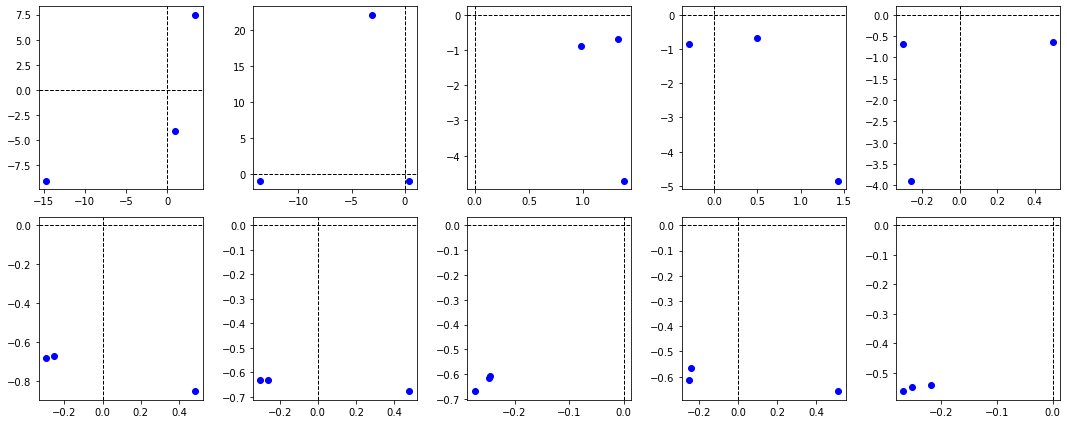

In [27]:
# Set the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))  # Adjust the figsize as needed

# Flatten the 2D array of subplots
axes = axes.flatten()

for i in range(len(display_tuples)):
    tup = display_tuples[i]
    x_values = [tup[0][0], tup[1][0], tup[2][0]]
    y_values = [tup[0][1], tup[1][1], tup[2][1]]

    # Create a scatter plot for the three points
    axes[i].scatter(x_values, y_values, c='blue', marker='o', label=f'Generation {10*(i+1)}')  
    # Add lines through the origin
    axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[i].axvline(0, color='black', linestyle='--', linewidth=1)
    
# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

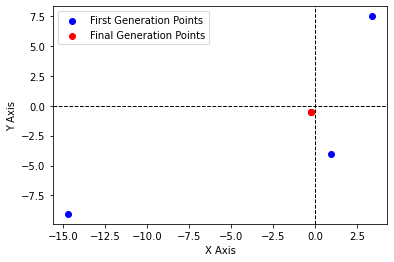

In [28]:
start = display_tuples[0]
end = display_tuples[-1]

# Extract x and y values for each set
x_values_set1, y_values_set1 = zip(*start)
x_values_set2, y_values_set2 = zip(*end)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
# Create a scatter plot for each set of points with different colors
plt.scatter(x_values_set1, y_values_set1, c='blue', marker='o', label='First Generation Points')
plt.scatter(x_values_set2, y_values_set2, c='red', marker='o', label='Final Generation Points')

# Set axis labels
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Add legend
plt.legend()

# Show the plot
plt.show()